<a href="https://colab.research.google.com/github/mofuoku417/Machine-Learning-Techniques-for-Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Prices/blob/main/Detecting_Anomalies_In_Natural_Gas_Prices_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Problem statement**

This project aims to Natural Gas data from 1997-01-07 - 2023-07-24 using anomaly detection techniques to uncover hidden patterns and outliers in the data. We will use the Pytorch library in Python to construct and train a model to detect anomalous data points within the dataset. Finally, we will analyze and interpret our results to draw meaningful conclusions about the Crude oil market.

In [1]:
!nvidia-smi

Thu Aug 24 04:11:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install chart_studio
!pip install plotly==4.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [3]:
!pip install plotly==4.8

In [4]:
# Check for GPU
import torch
torch.cuda.is_available()

True

#### Importing the relevant libraries

In [6]:
from pandas import read_csv
import plotly
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from datetime import date, timedelta # Date Operations
import matplotlib.pyplot as plt # To aid in visualizing
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates # Date formatting
# sets the random number seed to ensure reproducible results
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

####Loading the dataset

In [181]:
# Establishing a timetable for data extraction
#today = date.today()
#end_date = today.strftime("%Y-%m-%d")
#start_date = '1993-03'
#start_date = '07-01-97'
#start_date = '1997-01-07'

# check the name of the index
# df.index.name
# result'date'

# del df['Unnamed: 0']
#Load dataset
path ='https://raw.githubusercontent.com/mofuoku417/anomaly-detection/main/Data/HHD.csv'
df = read_csv(path, parse_dates=['Date'])
#df = read_csv(path, parse_dates=True)

# , parse_dates=['date'], index_col='date'

df.head(6)
#df.index.name

Date   HHD
0 1997-01-07  3.82
1 1997-01-08  3.80
2 1997-01-09  3.61
3 1997-01-10  3.92
4 1997-01-13  4.00
5 1997-01-14  4.01

In [ ]:
'''
date_index = pd.date_range(start='1997-01-07', end='2023-07-25', freq='MS')
df = date_index
df

#df['Date'] = pd.DataFrame(date_rng, columns=['Date'])
'''

In [182]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6676 non-null   datetime64[ns]
 1   HHD     6675 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 104.4 KB


In [ ]:
'''
df['date_time'] = pd.to_datetime(df['Date'])
df.index
'''

In [183]:
df.dtypes

Date    datetime64[ns]
HHD            float64
dtype: object

###Data Preprocessing

In [10]:
#print(f"Downloaded {len(df)} rows of data.")
#df

In [184]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
'''
def create_time_features(df, target=None):
    """
    Creates time-series features from Datetime index
    """
    df['Date'] = df.index
    X = df.drop(['Date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X
'''

In [ ]:
'''
date_rng = pd.date_range(start='1997-01-07', end='2023-07-25', freq='MS')
df['Date'] = pd.DataFrame(date_rng, columns=['Date'])
df.head()
df.info()
'''

In [ ]:
'''
date_rng = pd.date_range(start='1997-01-07', end='2023-07-25', freq='MS')
df['Date'] = df['Date'].apply(pd.to_datetime)
df['Date'] = pd.DataFrame(date_rng, columns=['Date'])


df.head()
df.info()
'''

In [ ]:
'''
dt = pd.date_range("1997-01-07","2023-07-25", freq='MS')
dt
'''

In [ ]:
'''
# set the dataframes
dt = pd.date_range("1997-01-07","2023-07-25", freq='MS')
idx = pd.DatetimeIndex(dt)

# print the dataframes
print(df)
print(idx)
print(dt)

dt = pd.DataFrame(dt)

# join the dataframes
# join the dataframes
df2 = df.join(dt, how='inner')
'''

In [ ]:
'''
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d").dt.strftime('%Y-%m-%d')
date_rng = pd.date_range(start='1997-01-07', end='2023-07-25', freq='MS')
df['Date'] = pd.DataFrame(date_rng, columns=['Date'])

date_rng
'''

'\ndf["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d").dt.strftime(\'%Y-%m-%d\')\ndate_rng = pd.date_range(start=\'1997-01-07\', end=\'2023-07-25\', freq=\'MS\')\ndf[\'Date\'] = pd.DataFrame(date_rng, columns=[\'Date\'])\n\ndate_rng\n'

In [ ]:
#df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [ ]:
#date_rng = pd.date_range(start='1997-01-07', end='2023-07-25', freq='MS')
#df['Date'] = pd.DataFrame(date_rng, columns=['Date'])

In [ ]:
# Converting date column from object to date format
#df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # Selecting only date
#df.index

In [ ]:
#date_rng = pd.date_range(start='1997-01-07', end='2023-07-25', freq='MS')
#df['Date'] = pd.DataFrame(date_rng, columns=['Date'])
#df['Date']

### Displaying the timeseries

In [ ]:
#df2["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d").dt.strftime('%Y-%m-%d')
#df2 = df.sort_values("Date").reset_index(drop=True)
'''
fig =  go.Figure()

fig.update_xaxes(range=["1997-01","2023-08"])
fig.update_layout(xaxis=dict(tickformat="%Y-%m-%d"))

fig.add_trace(go.Line(x=df.index,y=df["HHD"]))
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df2.index,
        ticktext = df2["Date"]
    )
)
fig.show(renderer="colab")
'''
'''
df3 = df2.set_index('Date').sort_index()
df3['2010-01-02':'2010-12-31'].plot(figsize=(20, 12))



fig = go.Figure()
fig.add_trace(go.Scatter(x=score.index, y=(score.Loss), mode='lines', name='Loss'))
fig.add_trace(go.Scatter(x=score.index, y=(score.Threshold), mode='lines', name='Threshold'))
fig.update_xaxes(range=["1997-01","2023-08"])
fig.update_layout(xaxis=dict(tickformat="%Y-%m-%d"))
fig.update_layout(showlegend=True)
fig.show(renderer="colab")

'''

In [80]:
df.reset_index(inplace = True)
df.head(5)

Date   HHD
0 1997-01-07  3.82
1 1997-01-08  3.80
2 1997-01-09  3.61
3 1997-01-10  3.92
4 1997-01-13  4.00

In [185]:
trace_HHD = go.Scatter(
    x = df["Date"],
    y = df["HHD"],
    mode = 'lines',
    name="HHD"
)
data = [trace_HHD]

layout = go.Layout(title="Daily Henry Hub Natural Gas Spot Price (Dollars per Million Btu)", xaxis=dict(title="Date"), yaxis=dict(title="Henry Hub Daily Natural Gas Prices") )

#layout = go.Layout(title="Daily Henry Hub Natural Gas Spot Price (Dollars per Million Btu)",xaxis_rangeslider_visible=True)
fig = go.Figure(data=data,layout=layout)

fig.update_xaxes(range=["1997-01","2023-08"])
fig.update_layout(xaxis=dict(tickformat="%Y-%m-%d"))

plotly.offline.iplot(fig)
fig.show(renderer="colab")

### Removing Missing Data

In [186]:
print(df.isnull().sum())
print('Old size %d'% len(df))
df2 = df.dropna(how='any',axis='rows')
print('New size %d' % len(df2))
df2.head()

Date    0
HHD     1
dtype: int64
Old size 6676
New size 6675


Date   HHD
0 1997-01-07  3.82
1 1997-01-08  3.80
2 1997-01-09  3.61
3 1997-01-10  3.92
4 1997-01-13  4.00

Deviation from established pattern is considered an anomaly in a given data. Apply a Boxplot to visualize these deviations.

In [187]:
fig = px.box(df2, y="HHD", title='Daily Henry Hub Natural Gas Price 1986-2000')
fig.show(renderer="colab")
# # Move the legend to the upper left corner
#fig.legend.location = 'top_left'

### Standardize the Data

In [188]:
df2

Date   HHD
0    1997-01-07  3.82
1    1997-01-08  3.80
2    1997-01-09  3.61
3    1997-01-10  3.92
4    1997-01-13  4.00
...         ...   ...
6671 2023-07-19  2.51
6672 2023-07-20  2.61
6673 2023-07-21  2.61
6674 2023-07-24  2.68
6675 2023-07-25  2.66

[6675 rows x 2 columns]

In [189]:
df3 = df2.set_index('Date')
train = df3[:'2021-01-01']
test = df3['2021-01-01':]
print(train.shape, test.shape)
print(df3)
# df4 = df3.set_index('Date').sort_index()

(6034, 1) (641, 1)
             HHD
Date            
1997-01-07  3.82
1997-01-08  3.80
1997-01-09  3.61
1997-01-10  3.92
1997-01-13  4.00
...          ...
2023-07-19  2.51
2023-07-20  2.61
2023-07-21  2.61
2023-07-24  2.68
2023-07-25  2.66

[6675 rows x 1 columns]


In [297]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

In [298]:
X_train, X_val = train_test_split(X_train, test_size = 0.15, random_state=RANDOM_SEED)
print(X_train.shape, X_val.shape,X_test.shape)

(5128, 1) (906, 1) (641, 1)


In [299]:
train_sequence  = X_train.astype(np.float32).tolist()
val_sequence = X_val.astype(np.float32).tolist()
test_sequence = X_test.astype(np.float32).tolist()

In [300]:
def create_dataset(sequences):
    dataset = [torch.tensor(s).unsqueeze(1) for s in sequences]

    n_seq, seq_len, n_features = torch.stack(dataset).shape
    return dataset, seq_len, n_features

In [301]:
train_dataset, seq_len, n_features = create_dataset(train_sequence)
val_dataset, _, _ = create_dataset(val_sequence)
test_dataset, _, _ = create_dataset(test_sequence)

### Building the LSTM Autoencoder

In [302]:
class Encoder(nn.Module):
    def __init__(self, seq_len, n_features):
        super(Encoder, self).__init__()

        self.seq_len = seq_len
        self.n_features = n_features
        self.hidden_dim = 2 * args.embedding_dim

        self.rnn1 = nn.LSTM(
          input_size=n_features,
          hidden_size=self.hidden_dim,
          num_layers=args.n_layers,
          batch_first=True
        )
        self.rnn2 = nn.LSTM(
          input_size=self.hidden_dim,
          hidden_size=args.embedding_dim,
          num_layers=args.n_layers,
          batch_first=True
        )

    def forward(self, x):
      x = x.reshape((args.batch_size, self.seq_len, self.n_features))
      x, (_, _) = self.rnn1(x)
      x, (hidden_n, _) = self.rnn2(x)
      return hidden_n.reshape((self.n_features, args.embedding_dim))

In [303]:
class Decoder(nn.Module):
    def __init__(self, seq_len, n_features):
        super(Decoder, self).__init__()

        self.seq_len = seq_len
        self.hidden_dim = 2 * args.embedding_dim
        self.n_features = n_features

        self.rnn1 = nn.LSTM(
        input_size=args.embedding_dim,
        hidden_size=args.embedding_dim,
        num_layers=args.n_layers,
        batch_first=True
        )
        self.rnn2 = nn.LSTM(
        input_size=args.embedding_dim,
        hidden_size=self.hidden_dim,
        num_layers=args.n_layers,
        batch_first=True
        )
        self.output_layer = nn.Linear(self.hidden_dim, n_features)

    def forward(self, x):
        # x shape(1,128)
        x = x.repeat(self.seq_len, args.batch_size)

        x = x.reshape((n_features, self.seq_len, args.embedding_dim))
        x, (hidden_n, cell_n) = self.rnn1(x)
        x, (hidden_n, cell_n) = self.rnn2(x)
        x = x.reshape((self.seq_len, self.hidden_dim))

        return self.output_layer(x)

In [304]:
class RecurrentAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features):
        super(RecurrentAutoencoder, self).__init__()
        self.seq_len = seq_len
        self.n_features = n_features

        self.encoder = Encoder(seq_len, n_features).to(args.device)
        self.decoder = Decoder(seq_len, n_features).to(args.device)
    def forward(self, x):
        x = self.encoder(x)

        x = self.decoder(x)
        return x

In [305]:
def train_model( train_dataset, val_dataset, n_epochs):
    model = RecurrentAutoencoder(seq_len, n_features)
    model = model.to(args.device)

    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

    criterion = nn.L1Loss(reduction='sum').to(args.device)

    history = dict(train=[], val=[])

    for epoch in range(1 , n_epochs + 1):
        model = model.train()
        ts = time.time()
        train_losses = []

        for seq_true in train_dataset:
            optimizer.zero_grad()

            seq_true = seq_true.to(args.device)
            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true)

            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        val_losses = []
        model = model.eval()
        with torch.no_grad():
            for seq_true in val_dataset:

                seq_true = seq_true.to(args.device)
                seq_pred = model(seq_true)

                loss = criterion(seq_pred, seq_true)

                val_losses.append(loss.item())
        te = time.time()
        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)
        history['train'].append(train_loss)
        history['val'].append(val_loss)

        print(f"Epoch: {epoch}  train loss: {train_loss}  val loss: {val_loss}  time: {te-ts} ")

        return model.eval(), history

In [313]:
from argparse import ArgumentParser
import argparse
import time
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#parser = ArgumentParser()
parser = argparse.ArgumentParser(
                    prog='ProgramName',
                    description='What the program does',
                    epilog='Text at the bottom of help')

args = parser.parse_args('')

args.device = 'cuda' if torch.cuda.is_available else 'cpu'

args.batch_size = 1

args.n_layers = 1
args.embedding_dim = 128


args.dropout = 0
args.use_bn = False

args.lr = 0.001
args.epoch = 100

model, history = train_model(train_dataset, val_dataset, args.epoch)

Epoch: 1  train loss: 0.014977468066527718  val loss: 0.006336470249686678  time: 24.73385214805603 


In [314]:
model

RecurrentAutoencoder(
  (encoder): Encoder(
    (rnn1): LSTM(1, 256, batch_first=True)
    (rnn2): LSTM(256, 128, batch_first=True)
  )
  (decoder): Decoder(
    (rnn1): LSTM(128, 128, batch_first=True)
    (rnn2): LSTM(128, 256, batch_first=True)
    (output_layer): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [315]:
def predict(model, dataset):
    predictions, losses = [], []
    criterion = nn.L1Loss(reduction='sum').to(args.device)

    with torch.no_grad():
        model = model.eval()
        for seq_true in dataset:
            seq_true = seq_true.to(args.device)
            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true)

            predictions.append(seq_pred.cpu().numpy().flatten())
            losses.append(loss.item())
    return predictions, losses

In [316]:
_, losses = predict(model, train_dataset)

<ipython-input-317-3228f938f381>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

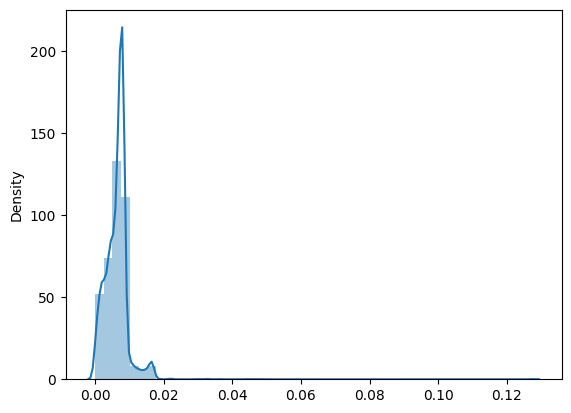

In [317]:
sns.distplot(losses, bins=50, kde=True)

<Axes: ylabel='Count'>

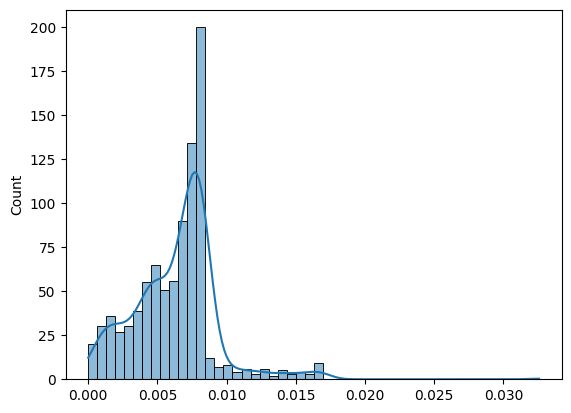

In [318]:
predictions, val_losses = predict(model, val_dataset)
sns.histplot(val_losses, bins=50, kde= True)

<ipython-input-319-3c40890f27e1>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

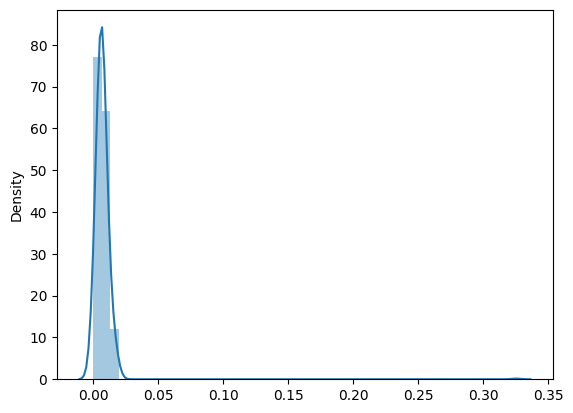

In [319]:
predictions, pred_losses = predict(model, test_dataset)
sns.distplot(pred_losses,bins=50, kde= True)

Threshold = 0.0155

In [320]:
total_losses = losses + val_losses + pred_losses
Threshold = 0.0155

### Create DataFrame of losses

In [321]:
score = pd.DataFrame(index = df3.index)
score['Loss'] = total_losses
score['Threshold'] = Threshold
#score['Anomaly'] = score['Loss'] > score['Threshold']

score['Anomaly'] = score['Loss'].apply(lambda dev: 1 if dev > Threshold else 0)
#Anom_count = score['Anomaly'].value_counts()
#Anom_count

anomalies = score[score['Anomaly'] == 1].reset_index(inplace = False)
not_anomalies = score[score['Anomaly'] == 0].reset_index(inplace = False)

print(f'Total normal: {not_anomalies.shape[0]}')
print(f'The total anomalies: {anomalies.shape[0]}')

Total normal: 6524
The total anomalies: 151


In [322]:
score.head(5)
score.tail(5)
#df4.head(5)
#df4.reset_index(inplace = True)

Loss  Threshold  Anomaly
Date                                    
2023-07-19  0.006076     0.0155        0
2023-07-20  0.006500     0.0155        0
2023-07-21  0.006500     0.0155        0
2023-07-24  0.006771     0.0155        0
2023-07-25  0.006696     0.0155        0

### Previewing the flagged anomalies:

### Viewing the flagged anomalies distribution:

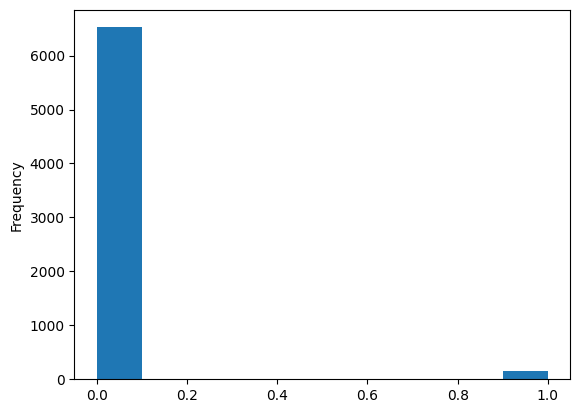

In [323]:
distribution:score['Anomaly'].plot(kind='hist')
plt.show()

### Visualizing anomalies in contrast to threshold

In [324]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=score.index, y=(score.Loss), mode='lines', name='Loss'))
fig.add_trace(go.Scatter(x=score.index, y=(score.Threshold), mode='lines', name='Threshold'))
fig.update_xaxes(range=["1997-01","2023-08"])
fig.update_layout(xaxis=dict(tickformat="%Y-%m-%d"))
fig.update_layout(showlegend=True)
fig.show(renderer="colab")

In [ ]:
# FEB 27, 2023
# Jan 14, 2005:
# Feb 2022
# July 2022
# 0.0083

In [226]:
score2 = pd.DataFrame({'Date': df['Date'], 'observation': df['HHD'], 'Loss': score.Loss})
score2.head(5)

Date  observation      Loss
0 1997-01-07         3.82  0.006058
1 1997-01-08         3.80  0.001354
2 1997-01-09         3.61  0.005704
3 1997-01-10         3.92  0.004703
4 1997-01-13         4.00  0.001660

In [224]:
score_df = pd.concat([score, score2], axis=1, join='inner')
score_df = score_df.loc[:,~score_df.columns.duplicated()].copy()
score_df

Date  observation      Loss
0    1997-01-07         3.82  0.006058
1    1997-01-08         3.80  0.001354
2    1997-01-09         3.61  0.005704
3    1997-01-10         3.92  0.004703
4    1997-01-13         4.00  0.001660
...         ...          ...       ...
6671 2023-07-19         2.51  0.006500
6672 2023-07-20         2.61  0.006500
6673 2023-07-21         2.61  0.006771
6674 2023-07-24         2.68  0.006696
6675 2023-07-25         2.66       NaN

[6676 rows x 3 columns]

In [ ]:
#score_df.set_index('Date', drop=True, inplace=True)
#score_df

In [ ]:
# set Date to index
score_df.set_index('Date', drop=True, inplace=True)
score_df

Loss  Threshold  Anomaly  observation
Date                                                 
1997-01-07  0.006058       0.02        0         3.82
1997-01-08  0.001354       0.02        0         3.80
1997-01-09  0.005704       0.02        0         3.61
1997-01-10  0.004703       0.02        0         3.92
1997-01-13  0.001660       0.02        0         4.00
...              ...        ...      ...          ...
2023-07-19  0.006076       0.02        0         2.52
2023-07-20  0.006500       0.02        0         2.51
2023-07-21  0.006500       0.02        0         2.61
2023-07-24  0.006771       0.02        0         2.61
2023-07-25  0.006696       0.02        0         2.68

[6675 rows x 4 columns]

In [ ]:
# check anomalies
score_df[score_df['Anomaly'] == 1].head()

Loss  Threshold  Anomaly  observation
Date                                                 
1997-07-08  0.021869       0.02        1         2.13
1998-04-09  0.127428       0.02        1         2.61
1999-09-01  0.032379       0.02        1         2.71
1999-11-16  0.044486       0.02        1         2.23
2003-01-27  0.036622       0.02        1         5.91

In [ ]:
import plotly.graph_objects as go
#fig = go.Figure()
#fig.add_trace(go.Scatter(x = score_df.Date, y=(score_df.observation), mode='lines', name='Loss'))
fig = px.line(score_df, x = 'Date', y='observation', title='NYC TAXI TRIPS – UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')

#fig.add_trace(go.Scatter(x=score.Date, y=(score.Anomaly), mode='lines', name='Anomaly'))
outlier_dates = score_df[score_df['Anomaly'] == 1].index
fig.update_xaxes(range=["1997-01","2023-08"])
fig.update_layout(xaxis=dict(tickformat="%Y-%m-%d"))

y_values = [score_df.loc[i]['observation'] for i in outlier_dates]
fig.add_trace(go.Scatter(x = outlier_dates, y = y_values, mode = 'markers', name = 'Anomaly', marker=dict(color='red',size=10)))


fig.show(renderer="colab")

ValueError: ignored

In [ ]:
score_df

Loss  Threshold  Anomaly  observation
Date                                                 
1997-01-07  0.006058       0.02        0         3.82
1997-01-08  0.001354       0.02        0         3.80
1997-01-09  0.005704       0.02        0         3.61
1997-01-10  0.004703       0.02        0         3.92
1997-01-13  0.001660       0.02        0         4.00
...              ...        ...      ...          ...
2023-07-19  0.006076       0.02        0         2.52
2023-07-20  0.006500       0.02        0         2.51
2023-07-21  0.006500       0.02        0         2.61
2023-07-24  0.006771       0.02        0         2.61
2023-07-25  0.006696       0.02        0         2.68

[6675 rows x 4 columns]

In [ ]:
# set Date to index
# score_df.set_index('Date', drop=True, inplace=True)

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head()

timestamp  value
0 2014-07-01 00:00:00  10844
1 2014-07-01 00:30:00   8127
2 2014-07-01 01:00:00   6210
3 2014-07-01 01:30:00   4656
4 2014-07-01 02:00:00   3820

In [ ]:
# create moving-averages
data['MA48'] = data['value'].rolling(48).mean()
data['MA336'] = data['value'].rolling(336).mean()

# plot
import plotly.express as px
fig = px.line(data, x='timestamp', y=['value', 'MA48', 'MA336'], title='NYC Taxi Trips', template = 'plotly_dark')
fig.show()

ValueError: ignored

In [ ]:
# create moving-averages
data['MA48'] = data['value'].rolling(48).mean()
data['MA336'] = data['value'].rolling(336).mean()

# plot
import plotly.express as px
fig = px.line(data, x="timestamp", y=['value'], title='NYC Taxi Trips', template = 'plotly_dark')
fig.show()

ValueError: ignored

In [ ]:
#fig = px.line(score_df, x='Date', y = "observation", title="NYC TAXI TRIPS – UNSUPERVISED ANOMALY DETECTION", template = 'plotly_dark')
fig = px.line(score_df, x='Date', y = "Loss", title="NYC TAXI TRIPS – UNSUPERVISED ANOMALY DETECTION", template = 'plotly_dark')
fig.add_trace(go.Scatter(x=score_df.Date, y=(score_df.Anomaly), mode='lines', name='Anomaly'))
#fig.add_trace(go.Scatter(x=score_df.Date, y=(score_df.Loss), mode='lines', name='Loss'))
fig.show(renderer="colab")

In [ ]:
score_df.Date

0       1997-01-07
1       1997-01-08
2       1997-01-09
3       1997-01-10
4       1997-01-13
           ...    
6670    2023-07-19
6671    2023-07-20
6672    2023-07-21
6673    2023-07-24
6674    2023-07-25
Name: Date, Length: 6675, dtype: object

In [ ]:
# Make a DataFrame that includes all anomalies.
# Let's use Plotly to generate an interactive chart to display data with anomalies.
# Let's use Plotly to generate an interactive chart to display data with anomalies.

<Figure size 1300x500 with 0 Axes>

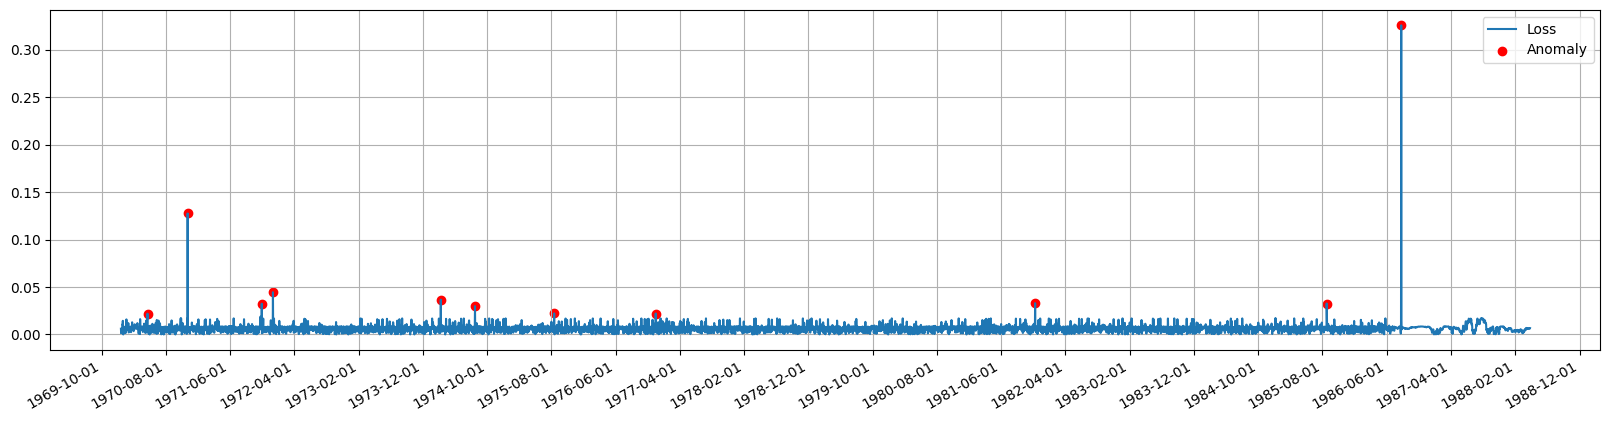

In [ ]:
# Ploting the results
plt.figure(figsize=(13,5))
plt.figure(figsize=(20,5))
plt.grid()
#plt.plot(score_df.index, score_df['observation'], color = 'red',  label = 'Test')
#plt.plot(score_df.index, score_df['Loss'], color = 'blue',label = 'ARIMA Prediction')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Rotation
plt.plot(score_df.index, score_df['Loss'], label='Loss')
plt.scatter(score_df[score_df['Anomaly'] == 1].index, score_df[score_df['Anomaly'] == 1]['Loss'], color='red')
plt.legend(['Loss', 'Anomaly'])
plt.show()

In [ ]:
!pip install pygwalker -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.7/293.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.9 MB/s eta 0:00:00


In [ ]:
import pygwalker as pyg
import pandas as pd

In [ ]:
pyg.walk(score_df)
fig.show(renderer="colab")

Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

In [ ]:
'''
time_series_df.load_date = pd.to_datetime(time_series_df.load_date, format='%Y%m%d')
time_series_df = time_series_df.sort_values(by="load_date")
time_series_df = time_series_df.reset_index(drop=True)
time_series_df.head()
'''

In [ ]:
anomalies = go.Scatter(name="Anomaly",
                       x='Date',
                       xaxis='x1',
                       yaxis='y1',
                       y=score_df['Anomaly'],
                       mode='markers',
                       marker = dict(color ='red',
                      size = 11,line = dict(
                                         color = "red",
                                         width = 2)))

Actuals = go.Scatter(name= 'Actuals',
                     x= Date,
                     y= score_df['observation'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="blue"))
Predicted = go.Scatter(name= 'Predicted',
                     x= Date,
                     y= score_df['predicted'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="orange"))
# create plot for error...
Error = go.Scatter(name="Error",
                   x=Date, y=score_df['Loss'],
                   xaxis='x1',
                   yaxis='y1',
                   mode='line',
                   marker=dict(size=12,
                               line=dict(width=1),
                               color="red"),
                   text="Error")

iplot(fig)
pyplot.show()

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.random((200,3)))
df['date'] = pd.date_range('2000-1-1', periods=200, freq='D')
mask = (df['date'] > '2000-6-1') & (df['date'] <= '2000-6-10')
print(df.loc[mask])

            0         1         2       date
153  0.434596  0.773880  0.601923 2000-06-02
154  0.892523  0.443380  0.607090 2000-06-03
155  0.631308  0.591697  0.702634 2000-06-04
156  0.237433  0.512364  0.104225 2000-06-05
157  0.384511  0.487667  0.652224 2000-06-06
158  0.950531  0.600651  0.743594 2000-06-07
159  0.506266  0.634104  0.070932 2000-06-08
160  0.254392  0.361853  0.472493 2000-06-09
161  0.045649  0.140024  0.276814 2000-06-10


In [ ]:
df = df[(df['date'] > '2000-6-1') & (df['date'] <= '2000-6-10')]
df.index

Int64Index([153, 154, 155, 156, 157, 158, 159, 160, 161], dtype='int64')

In [ ]:
import pandas as pd

d = pd.date_range(start='1/1/1980', end='11/1/1990', freq='MS')
print(d)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1990-02-01', '1990-03-01', '1990-04-01', '1990-05-01',
               '1990-06-01', '1990-07-01', '1990-08-01', '1990-09-01',
               '1990-10-01', '1990-11-01'],
              dtype='datetime64[ns]', length=131, freq='MS')


In [ ]:
# set the dataframes
import pandas as pd
dt = pd.date_range("08-11-2014","08-27-2014", index=True)
idx = pd.DatetimeIndex(dt, index=True)

# print the dataframes
print(df)
print(idx)
print(dt)

# join the dataframes
df2 = df.join(dt, how='inner')

TypeError: ignored